# Students performance in Exams- EDA in depth
###### 1º hipótesis: ¿La raza y género influyen en las notas?
###### 2º hipótesis: ¿La raza y el género influyen en que se te den mejor unas materias que otras?
###### 3º hipótesis: ¿Los estudios de los padres influyen en las notas de sus hijos?
###### 4º hipótesis: ¿Los alumnos que han hecho el curso 0, sacan mejores notas?
###### 5º hipótesis: ¿Los alumnos con beca de comida sacan mejores notas al valorar la oportunidad de estudiar?
###### Hipótesis final: ¿Somos prejuiciosos?

###### Antes de comenzar, señalar que este dataset contiene datos ficticios y cualquier conclusión que se obtenga de ellos servirá únicamente para ayudar a data scientists novatos a practicar su código.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
'''
Vamos a cambiar el nombre de las razas para que parezca que conocemos las nacionalidades reales del estudio.
'''

grupos = ['group A', 'group B', 'group C', 'group D', 'group E']
razas = ['Afroamericanos', 'Nativos', 'Latinoamericanos', 'Caucásicos', 'Asiáticos']

for el in range(5):
    
    data['race/ethnicity'] = data['race/ethnicity'].replace(grupos[el], razas[el])

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,Nativos,bachelor's degree,standard,none,72,72,74
1,female,Latinoamericanos,some college,standard,completed,69,90,88
2,female,Nativos,master's degree,standard,none,90,95,93
3,male,Afroamericanos,associate's degree,free/reduced,none,47,57,44
4,male,Latinoamericanos,some college,standard,none,76,78,75


In [4]:
# Para empezar vamos a ver las características del Data Frame:

print(data.shape, '\n')
print(data.isnull().sum())
data.describe()

(1000, 8) 

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


###### Podemos observar que el dataset no incluye valores nulos, lo cual nos va a facilitar mucho la vida a la hora de jugar con los datos.
###### Pasemos ahora  estudiar la proporción de estudiantes por género y raza:

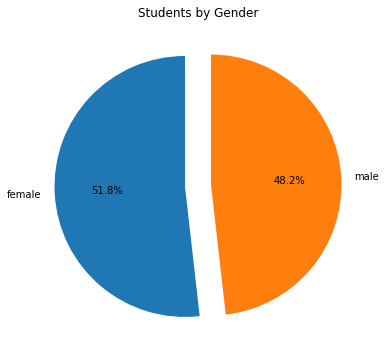

In [5]:
# Vamos a ver la distribución de estudiantes por género y raza:

fig, ax = plt.subplots(figsize = (12, 6))

labels = list(data['gender'].unique())
plt.pie(x = data['gender'].value_counts(), labels = labels, startangle = 90, autopct="%.1f%%", explode=[0.1,0.1]);

plt.title('Students by Gender');

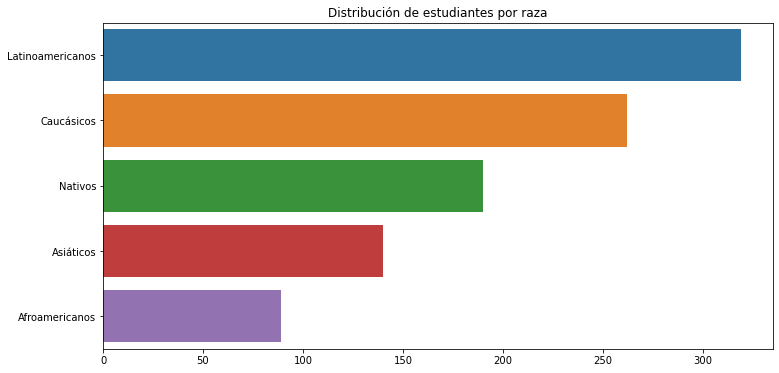

In [6]:
# Ahora vamos a ver la distribución de estudiantes por raza:
razas = data.groupby('race/ethnicity').count().sort_values(by = 'gender', ascending = False).index

fig, ax = plt.subplots(figsize = (12, 6))
labels = list(data['race/ethnicity'].unique())
sns.countplot(y = data['race/ethnicity'], order = razas)
plt.ylabel('Count')
plt.title('Distribución de estudiantes por raza')
ax.set_ylabel('')
ax.set_xlabel('');

### Podemos ver que la distribución de estudiantes por género es prácticamente equitativa (con una ligera dominancia del género femenino.
### Por otro lado, se aprecian notables diferencias entre la cantidad de alumnos entre las diferentes razas, con la una clara predominancia por parte de la raza latinoamericana y apenas representación por parte del grupo afroamericano.

# 1º hipótesis: ¿La raza o el género influyen en las notas obtenidas?

In [7]:
'''
Para comprobar esta hipótesis, vamos a jugar un poco con los datos. Como hemos visto antes, tenemos la nota exacta de
cada estudiante, pero esto puede dificultar un poco la lectura de los datos, por lo que vamos a asignar etiquetas a los
diferentes rangos de notas y añadir una columna con la media de las 3 notas:

Vamos a cambiar el nombre de los grupos por razas reales, para hacerlo más divertido.
'''

notas = [0, 60, 70, 80, 90, 100]
etiquetas = ['F', 'D', 'C', 'B', 'A']
data['math_score'] = pd.cut(data['math score'], notas, labels = etiquetas)
data['reading_score'] = pd.cut(data['reading score'], notas, labels = etiquetas)
data['writing_score'] = pd.cut(data['writing score'], notas, labels = etiquetas)

data['general score'] = round(data[['math score', 'reading score', 'writing score']].mean(axis = 1), 2)
data['general_score'] = pd.cut(data['general score'], notas, labels = etiquetas)

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_score,reading_score,writing_score,general score,general_score
0,female,Nativos,bachelor's degree,standard,none,72,72,74,C,C,C,72.67,C
1,female,Latinoamericanos,some college,standard,completed,69,90,88,D,B,B,82.33,B
2,female,Nativos,master's degree,standard,none,90,95,93,B,A,A,92.67,A
3,male,Afroamericanos,associate's degree,free/reduced,none,47,57,44,F,F,F,49.33,F
4,male,Latinoamericanos,some college,standard,none,76,78,75,C,C,C,76.33,C


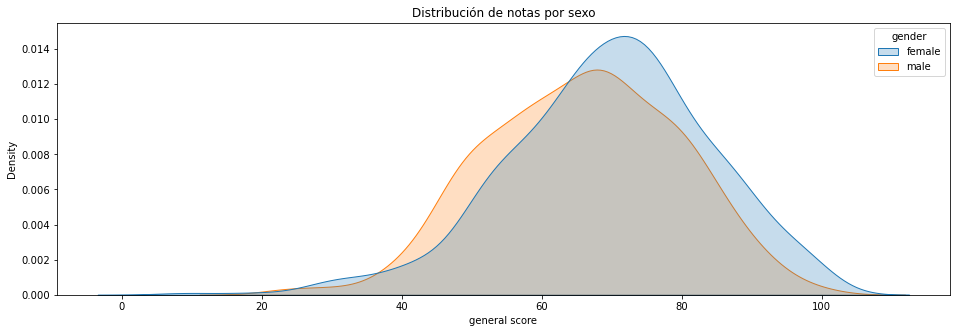

In [8]:
'''
En el siguiente gráfico podemos observar claramente una diferencia en las notas cuando dividimos a los alumnos por sexo.
En las notas más bajas tenemos a más alumnos masculinos, mientras que en las notas más altas predomina el sexo femenino.
Por tanto podemos decir que la 1º parte de la 1º hipótesis es correcta:

El sexo si influye para sacar mejores notas.
'''

fig = plt.figure(figsize = (16, 5))
sns.kdeplot(data = data, x = 'general score', hue = 'gender', shade = True)

plt.title('Distribución de notas por sexo');

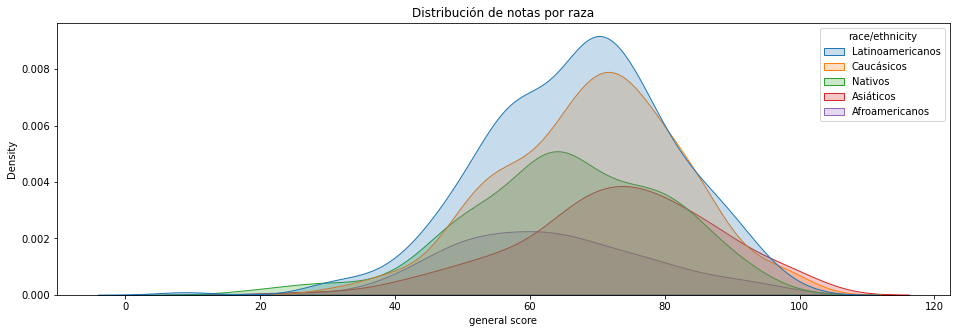

In [27]:
'''
Por otro lado, observamos que la distribución de notas por raza es similar en casi todas ellas.
Sin embargo, podemos ver la diferencia de notas entre afroamericanos (notas más bajas) y asiáticos (notas más altas).

Por tanto podemos decir que la raza si influye en las notas obtenidas.
'''

fig = plt.figure(figsize = (16, 5))
hue_order = ['Latinoamericanos', 'Caucásicos', 'Nativos', 'Asiáticos', 'Afroamericanos']
sns.kdeplot(data = data, x = 'general score', hue = 'race/ethnicity', hue_order = hue_order, shade = True)
plt.title('Distribución de notas por raza');

# 2º hipótesis: ¿La raza y el género influyen en que se te den mejor unas materias que otras?

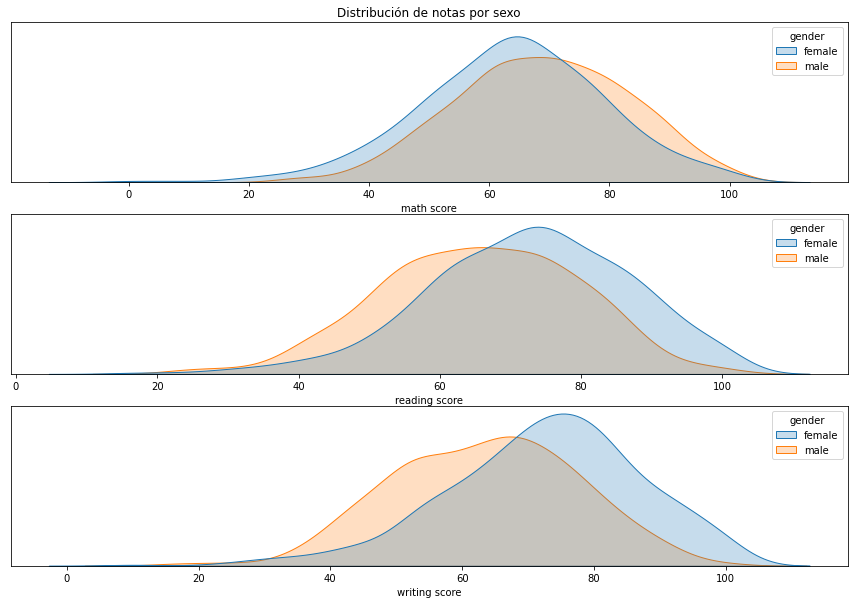

In [10]:
'''
Ahora vamos a comprobar las notas de cada una de las asignaturas, por sexo.
Podemos observar que el género masculino ha obtenido mejores notas en matemáticas y que el género femenino tiene
mejores calificaciones en escritura y lectura.
Por tanto, el género si influye en que se te den mejor unas asignaturas que otras.
'''

fig, ax = plt.subplots(3, 1, figsize = (15, 10), sharey=True)
ax[0].title.set_text('Distribución de notas por sexo')

asignaturas = ['math score', 'reading score', 'writing score', 'general score']

for el in range(3):
    sns.kdeplot(data = data, x = asignaturas[el], hue = 'gender', ax = ax[el], shade = True)
    ax[el].yaxis.set_visible(False)

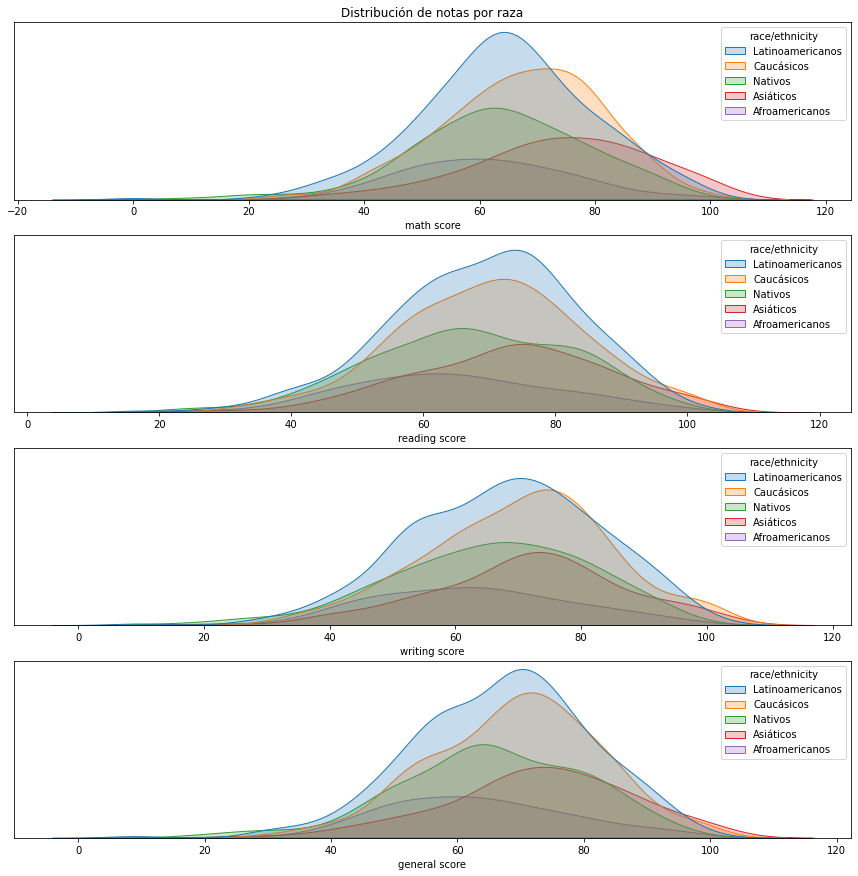

In [11]:
'''
En las gráficas a continuación podemos observar que la raza que mejores notas ha obtenido en todo es la asiática.
Por contra, los afroamericanos han obtenido las peores calificaciones.
Podemos afirmar que dependiendo de la raza, los alumnos tienen mejores o peores calificaciones.

Esto se puede deber a otros factores como la posición social, pero en este dataset nos centraremos en los datos que tenemos.
'''

fig, ax = plt.subplots(4, 1, figsize = (15, 15), sharey=True)
ax[0].title.set_text('Distribución de notas por raza')

for el in range(4):
    sns.kdeplot(data = data, x = asignaturas[el], hue = 'race/ethnicity', shade = True, ax = ax[el], hue_order = hue_order)
    ax[el].yaxis.set_visible(False)

In [12]:
# Vamos a ordenar las razas en el gráfico de mayor a menor nota media, para facilitar la visualización:

general = data.groupby('race/ethnicity').mean().sort_values('general score', ascending = False).index
math = data.groupby('race/ethnicity').mean().sort_values('math score', ascending = False).index
reading = data.groupby('race/ethnicity').mean().sort_values('reading score', ascending = False).index
writing = data.groupby('race/ethnicity').mean().sort_values('writing score', ascending = False).index

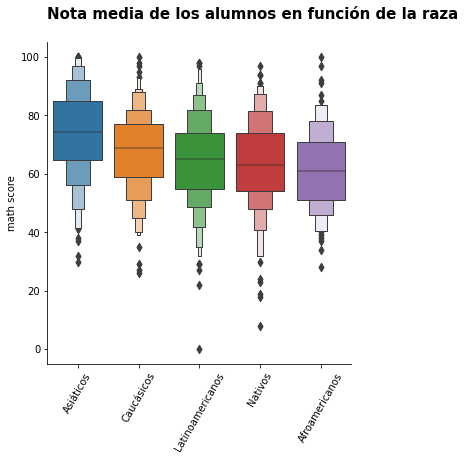

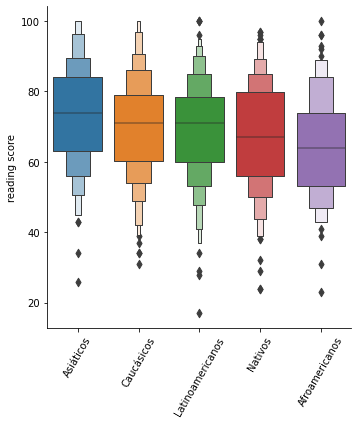

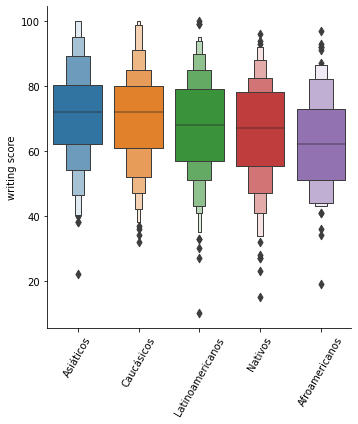

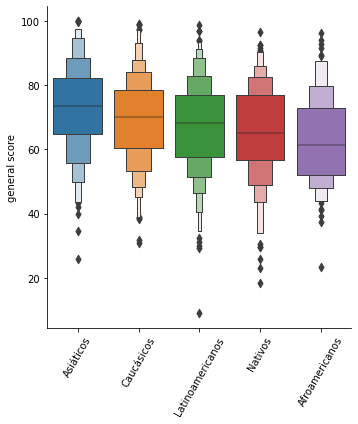

In [29]:
for el in range(4):
    
    sns.catplot(data = data.sort_values("race/ethnicity"),
                x = 'race/ethnicity',
                y = asignaturas[el],
                order = math,
                kind = 'boxen',
                ax = ax[el])
    plt.xticks(rotation=60)
    plt.xlabel('')

    if el == 0:
        plt.title('Nota media de los alumnos en función de la raza\n', fontsize = 15, fontweight = 'bold', loc = 'left');

# 3º hipótesis: ¿Los estudios de los padres influyen en las notas de sus hijos?

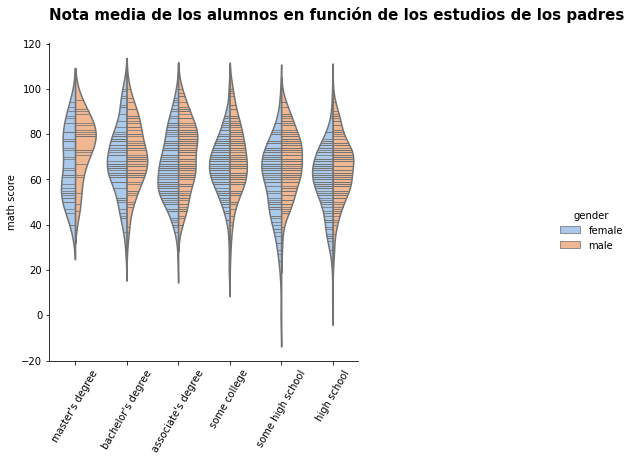

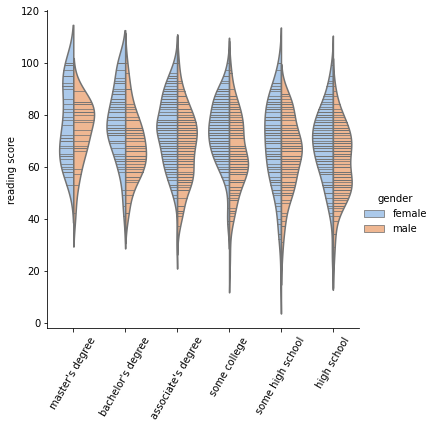

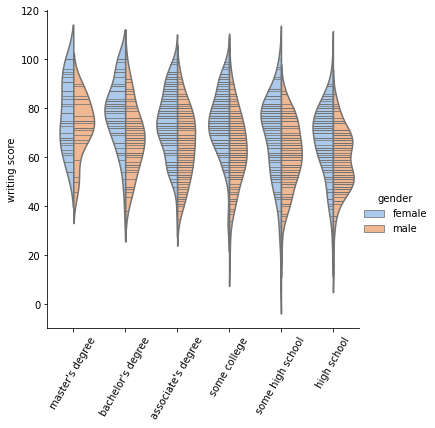

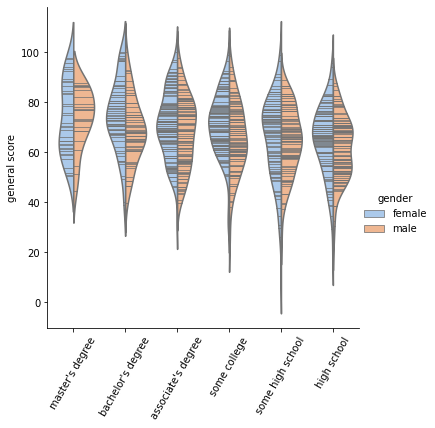

In [14]:
'''
Aquí podemos observar que los estudiantes cuyos padres tienen estudios superiores tienen mejores notas que aquellos
cuyos padres un menor nivel de estudios.
Por tanto la 3º hipótesis es cierta.
'''

orden = data.groupby('parental level of education').mean().sort_values('general score', ascending = False)

for el in range(4):
    sns.catplot(data = data,
                x = 'parental level of education',
                y = asignaturas[el],
                hue = 'gender',
                kind = 'violin',
                inner="stick",
                split=True,
                order = orden.index,
                palette = 'pastel')
    if el == 0:
        plt.title('Nota media de los alumnos en función de los estudios de los padres\n', fontsize = 15, fontweight = 'bold', loc = 'left');
        
    plt.xticks(rotation=60)
    plt.xlabel('')

In [15]:
'''
Para corroborar esta hipótesis de otra manera:
'''
educacion = data.groupby('parental level of education').mean().sort_values('general score', ascending = False)
educacion

,math score,reading score,writing score,general score
parental level of education,,,,
master's degree,69.745763,75.372881,75.677966,73.598644
bachelor's degree,69.389831,73.000000,73.381356,71.923983
associate's degree,67.882883,70.927928,69.896396,69.568964
some college,67.128319,69.460177,68.840708,68.476106
some high school,63.497207,66.938547,64.888268,65.107654
high school,62.137755,64.704082,62.448980,63.097194


# 4º hipótesis: ¿Los alumnos que han hecho el curso 0, sacan mejores notas?

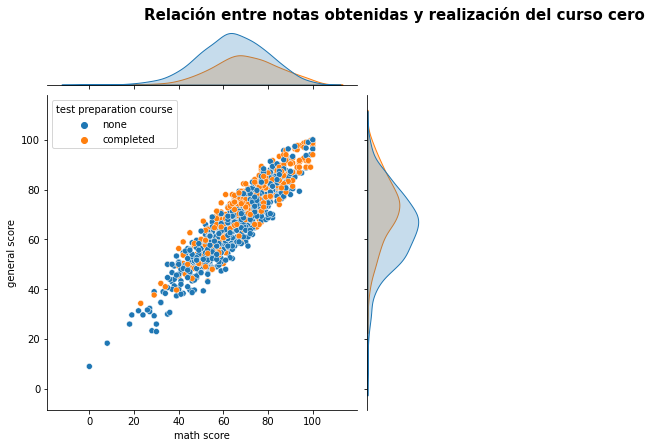

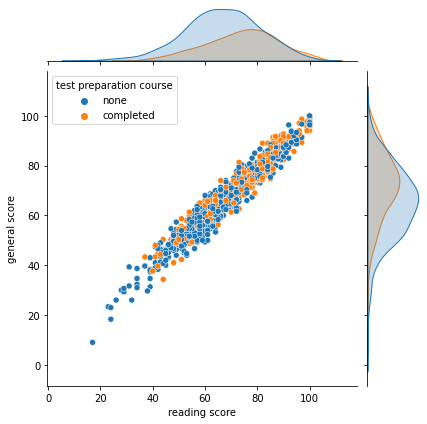

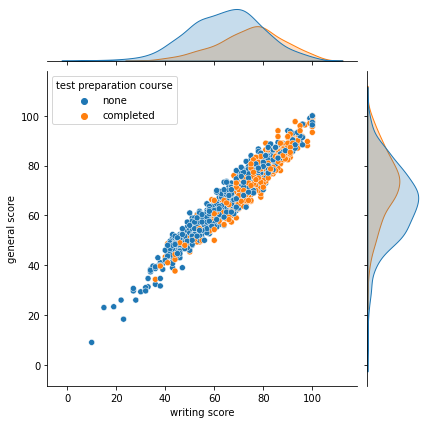

In [16]:
'''
En estos gráficos estamos viendo la relación entre la nota general y las específicas, teniendo en cuenta
si los alumnos han realizado el curso cero o no.

Claramente vemos que la distrubución de notas de los alumnos que si fueron al curso cero está más desplazada a la derecha
que la de aquellos alumnos que no hicieron el curso.

Podemos afirmar que la 4º hipótesis es cierta.
'''

for el in range(3):
    sns.jointplot(data = data, x = educacion.columns[el], y = 'general score', hue = 'test preparation course');
    
    if el ==0:
        plt.title('Relación entre notas obtenidas y realización del curso cero\n\n\n\n', fontsize=15, fontweight='bold', loc = 'center');

# 5º hipótesis: ¿Los alumnos con beca de comida sacan mejores notas al valorar la oportunidad de estudiar?

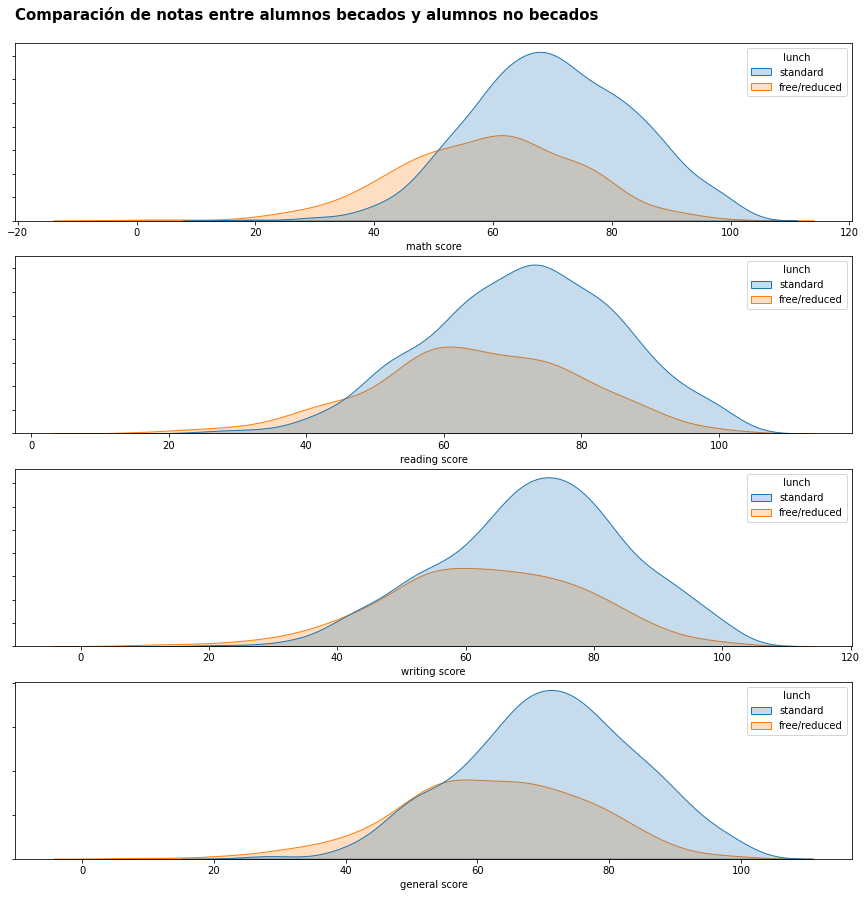

In [35]:
'''
En los siguientes gráficos podemos ver claramente como los alumnos con tarifa gratis/reducida de dietas (becados)
tienen peores calificaciones que los alumnos con matrícula normal.
Por tanto la 5º hipótesis es falsa.
'''
fig, ax = plt.subplots(4, 1, figsize = (15, 15))

lista = ['math score', 'reading score', 'writing score', 'general score']

for el in range(4):
    
    grafico = sns.kdeplot(data=data, x = lista[el], hue = 'lunch', shade = True, ax = ax[el])
    grafico.set(yticklabels=[])
    grafico.set_ylabel('')
    
    if el == 0:
        grafico.set_title('Comparación de notas entre alumnos becados y alumnos no becados\n', fontsize = 15, fontweight = 'bold', loc = 'left');

### Hipótesis final

Esta hipótesis se resolverá el día de la presentación, tras ver los resultados en el Kahoot de la clase.
He aprovechado los clichés de la sociedad:

He colocado a los alumnos asiáticos como los mejores (académicamente hablando) y a los afroamericanos los peores.
En este dataset el género femenino tiene mejores notas que el género masculino.
Al género masculino se le dan mejor las matemáticas y al femenino la lectura y escritura...